Pre-requirements! Select some users and put
them into a CSV in `./demo/users.csv`. Include column names!

```sql
select id, name, surname, signupDate
from User
limit 1000000;
```

Effortless shell integration:

In [1]:
!head -n 5 ../data/users.csv

id,name,surname,signupDate
0000019ef95d4b2799cb23453a0b552e,cleopatraslots,"",2011-12-11 07:50:23
0000027a49ed41fdafbd66da296b72de,mero,"",2013-06-23 22:28:43
000002a65d31401288bcf5e79f0cee20,Bernard,Bray,2015-02-16 11:53:54
000002c7103c4936b588a120ae7e1d4d,totobooksite,"",2020-09-06 13:49:18


We can read from CSV in one line:

In [2]:
import pandas as pd
df = pd.read_csv('../data/users.csv',
				 parse_dates=['signupDate'])
df.describe()

<ipython-input-2-ff6228d64111>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,id,name,surname,signupDate
count,1000000,999400,637374,1000000
unique,1000000,397694,297977,996756
top,0a7c87d1273347ac8477dc85dd6a495e,First,Last,2007-06-05 22:00:00
freq,1,22054,22208,786
first,NaN,NaN,NaN,2007-06-05 22:00:00
last,NaN,NaN,NaN,2020-12-03 22:11:37


Many ways to look inside:

In [3]:
df.sample(5)

,id,name,surname,signupDate
255028,05ebcf3a0dd2449293ad1fc4192fbbb8,ABHINASH.K.P,NaN,2018-01-23 17:17:50
498875,0b9346b1e1ce44d88d501708fe660a43,David,Mayo,2011-02-25 14:48:06
368664,088d2ac3a2ce4638b60530c98d7499a9,Brigitte,Chapman,2015-05-19 12:12:15
601504,0df2f3ec37f94f1eb4a7dcb9b1ffd34a,QUIATOL,HUBERT,2017-04-11 23:41:22
460382,0aaf2f558ab74d2ebab522315271e0c6,uggs,clearance,2011-07-08 01:39:18


In [4]:
df.head(2)

,id,name,surname,signupDate
0,0000019ef95d4b2799cb23453a0b552e,cleopatraslots,NaN,2011-12-11 07:50:23
1,0000027a49ed41fdafbd66da296b72de,mero,NaN,2013-06-23 22:28:43


In [5]:
df.tail(3)

,id,name,surname,signupDate
999997,172cd3141e824aad8b2defbf68760970,kristian,king,2014-12-07 03:42:54
999998,172cd4692f8e4bedb7627e44ec1f9f66,keyara,otero,2014-11-04 17:40:07
999999,172cd603314f4a08a856ef7eecca05fe,SRIJAN,NaN,2017-10-19 10:31:37


How many people have both names set?

In [6]:
df.dropna().count()


id            636852
name          636852
surname       636852
signupDate    636852
dtype: int64

How many full namesakes live in Yola?

In [7]:
namesakes = df.value_counts(['name', 'surname'])
namesakes.head(10)

name            surname   
First           Last          22014
Demo            Demo           2925
Kunde           Kunde          1120
WebsiteBuilder  Activeuser      828
Marvin          Mikkelson       165
Sibername       Customer        164
John            Smith           130
kunde           kunde           119
john            Francis         106
1               1                68
dtype: int64

In [8]:
namesakes.iloc[10:20]

name      surname 
john      john        64
          smith       59
David     David       58
James     James       57
Daniel    Daniel      54
alex      alex        53
John      John        53
Jhon      Smith       52
Billups,  Chauncey    51
Chris     Chris       50
dtype: int64

Are there any Anton's? Please export them as Python dictionaries.

In [9]:
df[df['name'] == 'Anton'].sample(3).to_dict(orient='records')

[{'id': '0a7099720d81465c824228d1a2838a8a',
  'name': 'Anton',
  'surname': 'Shauchenka',
  'signupDate': Timestamp('2011-11-03 12:24:19')},
 {'id': '00ad1b31d86f49f7b1f229b67b284061',
  'name': 'Anton',
  'surname': 'Petek',
  'signupDate': Timestamp('2014-09-18 14:55:51')},
 {'id': '0c8ece61ac044cac9a226c20ec5969c4',
  'name': 'Anton',
  'surname': 'Gawtee',
  'signupDate': Timestamp('2013-04-16 04:41:17')}]

When were the happiest days in Yola?

In [10]:
signup_by_day = df.apply(
	lambda row: row.signupDate.date(),
	axis='columns').value_counts()

In [11]:
# Same but fancy

import swifter  # noqa
signup_by_day = df.swifter.apply(  # noqa
	lambda row: row.signupDate.date(),
	axis='columns').value_counts()

In [12]:
## This is done to embed plots into notebooks

import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Day', ylabel='User Signup Count'>

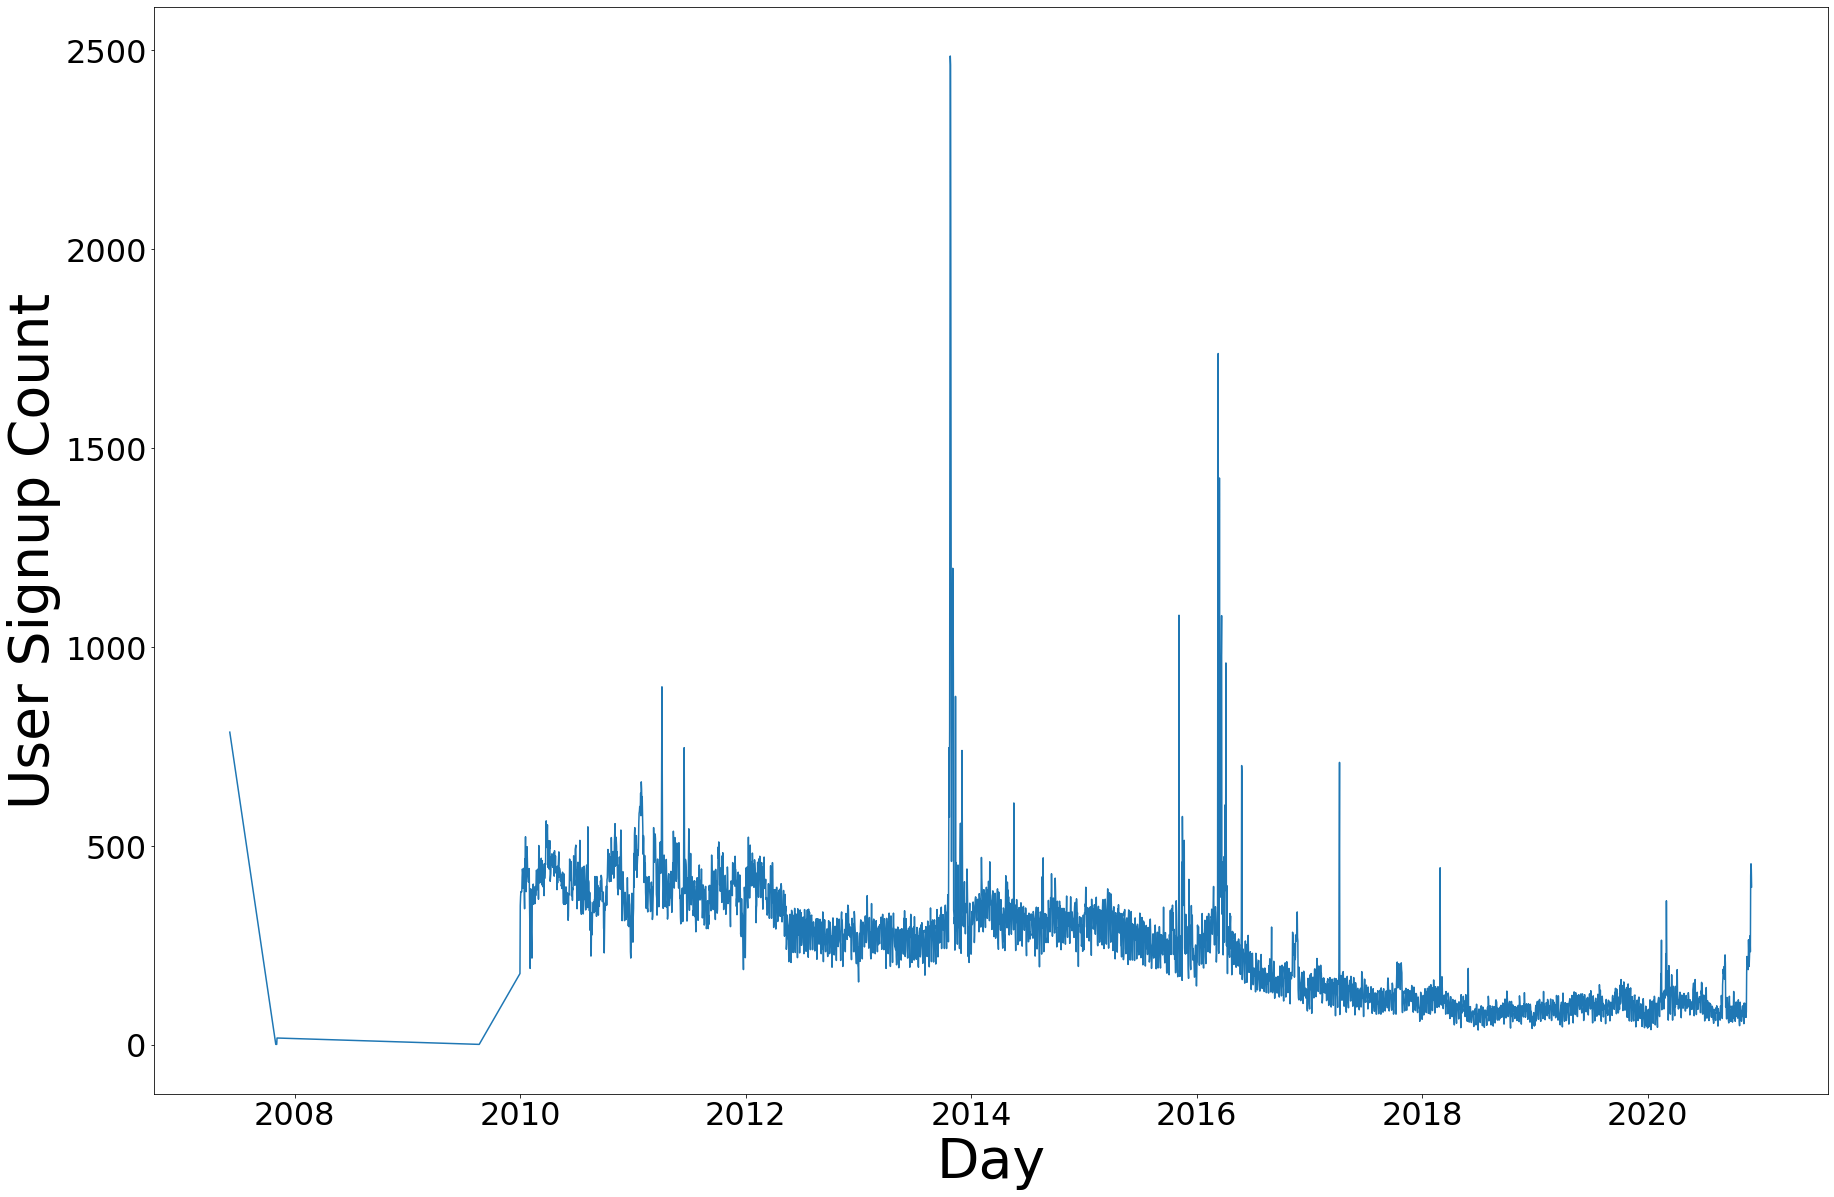

In [13]:
label_settings = dict(fontsize='xx-large')
plt.figure(figsize=(30, 20))
plt.rc('font', **{'size': 32})
plt.xlabel('Day', **label_settings)
plt.ylabel('User Signup Count', **label_settings)
signup_by_day.plot()

In [14]:
signup_by_day.sort_values(ascending=False).head(10)

2013-10-25    2486
2013-10-26    2463
2013-10-24    1783
2013-10-27    1779
2016-03-11    1738
2016-03-15    1425
2016-03-10    1378
2013-11-02    1198
2013-11-03    1196
2015-11-05    1080
dtype: int64

Let's analyse our users by gender

In [15]:
gender_data_url = 'https://raw.githubusercontent.com/OpenGenderTracking/globalnamedata/master/assets/usprocessed.csv'
gender_data = pd.read_csv(gender_data_url).set_index('Name')
gender_data.sample(10)

,years.appearing,count.male,count.female,prob.gender,obs.male,est.male,upper,lower
Name,,,,,,,,
Allyana,15,0,233,Female,0.0,0.0,1.003313,0.980468
Teuna,1,0,6,Female,0.0,0.0,1.052446,0.557219
Sitlali,14,0,139,Female,0.0,0.0,1.005441,0.967665
Awbree,3,0,17,Female,0.0,0.0,1.032023,0.783659
Arwilda,19,0,113,Female,0.0,0.0,1.006617,0.960505
Kwanze,1,5,0,Male,1.0,1.0,1.054572,0.510945
Germell,1,5,0,Male,1.0,1.0,1.054572,0.510945
Alexisrose,1,0,7,Female,0.0,0.0,1.050109,0.595561
Kirrah,9,0,71,Female,0.0,0.0,1.010162,0.938510


In [16]:
df['name'] = df['name'].str.capitalize()
df.sample(5)

,id,name,surname,signupDate
404937,096468589c864c3e92057877c087babc,Malakas500,NaN,2011-03-14 10:17:11
535567,0c6cd9a7e7474f0796aa343899b533d4,Erick,polanco,2011-05-18 21:35:30
502197,0ba7112d2f174ad08c3d126f6ddca3bc,Demo,Demo,2018-11-12 19:39:03
64625,018067c623814bbc9a706081fff2bfe2,Davidrichards,NaN,2016-11-23 10:48:49
842713,1388b16e29e24cd6bccdda9428421776,Globalblis,NaN,2017-01-22 19:20:09


In [17]:
merged_df = gender_data.join(df.set_index('name'), how='outer')
merged_df.sample(5)

,years.appearing,count.male,count.female,prob.gender,obs.male,est.male,upper,lower,id,surname,signupDate
Cashadvance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00eb4d8ac3d34ec58b7d8407247a2591,NaN,2015-08-29 10:36:37
Muhammed,41.0,1525.0,0.0,Male,1.000000,1.000000,1.000519,0.996968,07d9376b046e4bdda68af2fe98d31b1c,NaN,2013-01-29 23:14:04
Luke,133.0,211892.0,466.0,Male,0.997806,0.997806,0.997996,0.997597,13df99697bf94f5785d7d610d7befb35,Evans,2012-01-30 23:12:26
Rakhi,6.0,0.0,48.0,Female,0.000000,0.000000,1.014367,0.911533,13dc72bea02644cab27966eb569291af,NaN,2015-07-10 18:22:39
Cesar,98.0,65271.0,315.0,Male,0.995197,0.995197,0.995699,0.994637,0646afd064044f76a74b6cc916eefdb3,Neves Camargo,2011-10-28 11:26:33


In [18]:
merged_df.value_counts('prob.gender')


prob.gender
Male       330010
Female     236586
Unknown     48366
dtype: int64